In [52]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm
import time
import datetime
import os
import glob

In [53]:
#Starting with Data used for ICE vehicles
#the following model practice will be used as well for hybrids once it's been finalized and Aircon can be used as a label


read_path = "C:/Users/Miles/Desktop/ICE data/Apps/OBDLink (1)/CsvLogs/"

dir_list_api = os.listdir(read_path)

In [54]:
#read through the csvs provided 
files = glob.glob('C:/Users/Miles/Desktop/ICE data/Apps/OBDLink (1)/CsvLogs/5YFBURHE2HP609481/*.csv')

full_df = pd.DataFrame()

for csv_file in files:
    df = pd.read_csv(csv_file, skiprows=[0, 1])
    full_df = pd.concat([full_df, df])

In [55]:
#merge data into one csv

full_df.to_csv('merged_vehicle_data_files.csv', index=False)

In [56]:
full_df

,0.000,34.24313,-118.5323,0,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.363,34.24313,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,NaN,NaN,NaN,NaN,2581.575,34.24299,-118.5321,0.0,0.0,137.7731,...,-15.38818,52.419270,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0
2300,NaN,NaN,NaN,NaN,2582.576,34.24298,-118.5321,0.0,0.0,137.7731,...,-76.65056,14.535920,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0
2301,NaN,NaN,NaN,NaN,2583.570,34.24298,-118.5321,0.0,0.0,137.7731,...,-57.51016,25.279460,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0
2302,NaN,NaN,NaN,NaN,2584.575,34.24297,-118.5321,0.0,0.0,137.7731,...,-10.57692,7.762176,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#different ways to account for NaN and 0 values
#experiement with using mean or winsorization
full_df.mean(axis=0, skipna = True)

0.000                                             179.404529
34.24313                                           34.243148
-118.5323                                        -118.532300
0                                                   0.000000
Time (sec)                                       1362.715332
                                                    ...     
 Intake air temperature bank 1  sensor 3 (°F)       0.000000
 Intake air temperature bank 2  sensor 1 (°F)       0.000000
 Intake air temperature bank 2  sensor 2 (°F)       0.000000
 Intake air temperature bank 2  sensor 3 (°F)       0.000000
 Vehicle Odometer Reading (miles)                   0.000000
Length: 68, dtype: float64

In [58]:
full_df.dropna(axis=1, how='all')

,0.000,34.24313,-118.5323,0,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.363,34.24313,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,NaN,NaN,NaN,NaN,2581.575,34.24299,-118.5321,0.0,0.0,137.7731,...,-15.38818,52.419270,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0
2300,NaN,NaN,NaN,NaN,2582.576,34.24298,-118.5321,0.0,0.0,137.7731,...,-76.65056,14.535920,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0
2301,NaN,NaN,NaN,NaN,2583.570,34.24298,-118.5321,0.0,0.0,137.7731,...,-57.51016,25.279460,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0
2302,NaN,NaN,NaN,NaN,2584.575,34.24297,-118.5321,0.0,0.0,137.7731,...,-10.57692,7.762176,0.820474,25.90675,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
full_df = full_df.drop(columns = ['0.000', '34.24313', '-118.5323', '0'])

In [60]:
mean_df = full_df.mean(axis=0, skipna = True)

#use for spread later
std_df = full_df.std(axis=0, skipna=True)
var_df = full_df.var(axis=0, skipna=True)

mean_and_std = [{
    
    'mean': mean_df.iloc[1],
    'std': std_df.iloc[1],
    'var': var_df.iloc[1]
    
}]

In [61]:
full_df.fillna(mean_df, inplace=True)
full_df

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,1362.715332,34.10812,-118.394295,32.01628,0.812984,66.905177,0.334762,52.631881,30.14426,1.059492,...,0.333614,-0.061220,0.394471,20.237581,0.0,0.0,0.0,0.0,0.0,0.0
1,1362.715332,34.10812,-118.394295,32.01628,0.812984,66.905177,0.334762,52.631881,30.14426,1.059492,...,0.333614,-0.061220,0.394471,20.237581,0.0,0.0,0.0,0.0,0.0,0.0
2,1362.715332,34.10812,-118.394295,32.01628,0.812984,66.905177,0.334762,52.631881,30.14426,1.059492,...,0.333614,-0.061220,0.394471,20.237581,0.0,0.0,0.0,0.0,0.0,0.0
3,1362.715332,34.10812,-118.394295,32.01628,0.812984,66.905177,0.334762,52.631881,30.14426,1.059492,...,0.333614,-0.061220,0.394471,20.237581,0.0,0.0,0.0,0.0,0.0,0.0
4,1362.715332,34.10812,-118.394295,32.01628,0.812984,66.905177,0.334762,52.631881,30.14426,1.059492,...,0.333614,-0.061220,0.394471,20.237581,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2581.575000,34.24299,-118.532100,0.00000,0.000000,137.773100,0.009296,0.000000,30.47809,0.028464,...,-15.388180,52.419270,0.820474,25.906750,0.0,0.0,0.0,0.0,0.0,0.0
2300,2582.576000,34.24298,-118.532100,0.00000,0.000000,137.773100,0.009296,0.000000,30.47809,0.028464,...,-76.650560,14.535920,0.820474,25.906750,0.0,0.0,0.0,0.0,0.0,0.0
2301,2583.570000,34.24298,-118.532100,0.00000,0.000000,137.773100,0.009296,0.000000,30.47809,0.028464,...,-57.510160,25.279460,0.820474,25.906750,0.0,0.0,0.0,0.0,0.0,0.0
2302,2584.575000,34.24297,-118.532100,0.00000,0.000000,137.773100,0.009296,0.000000,30.47809,0.028464,...,-10.576920,7.762176,0.820474,25.906750,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

param_grid = {'max_depth': [4, 8], 
             'min_samples_leaf': [25, 50]}



#test using Engine Power until Aircon System calculation has been obtained 

y=full_df[' Engine Power (hp)']
x=full_df.loc[:, full_df.columns != ' Engine Power (hp)']

In [63]:
print(x.shape)
print(y.shape)

(22137, 63)
(22137,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

print(X_train.shape)
print(X_test.shape)

(15495, 63)
(6642, 63)


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Starting with DecisionTreeRegressor, use GridSearch for params

dt_regressor = DecisionTreeRegressor()

dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Done


In [66]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.51


In [67]:
dt_best_params = dt_grid_search.best_estimator_

dt_best_params

DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)

In [68]:
dt_model = DecisionTreeRegressor(max_depth = 8, min_samples_leaf=25)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)

In [69]:
#make prediction
y_dt_pred = dt_model.predict(X_test)

#Compute the RMSE using mean_squared_error()
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)

# Compute the R2 score using r2_score()
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.6987865859074168
[DT] R2: 0.9972827326946715


In [70]:
#ensemble methods
#starting with GBDT and random forest. XGBoost is a more extreme version of GBDT, so I'll use 
#that later

#GBDT
from sklearn.ensemble import GradientBoostingRegressor


#create model
gbdt_model = GradientBoostingRegressor(n_estimators = 300, max_depth = 3)
gbdt_model.fit(X_train, y_train)

#predictions
y_gbdt_pred = gbdt_model.predict(X_test)

#take evaluation metrics
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2   = r2_score(y_test, y_gbdt_pred)         

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))    

[GBDT] Root Mean Squared Error: 0.29283725620555545
[GBDT] R2: 0.9995228049806072


In [71]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


#create and fit model
rf_model = RandomForestRegressor(max_depth=32, n_estimators = 300)
rf_model.fit(X_train, y_train)

#make predictions
y_rf_pred = rf_model.predict(X_test)

#take evaluation metrics
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)
                   
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))    



[RF] Root Mean Squared Error: 0.3040256839321367
[RF] R2: 0.9994856440211132


In [72]:
rf_grid = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)

In [73]:
#put rf model with optimal params in here !!!!



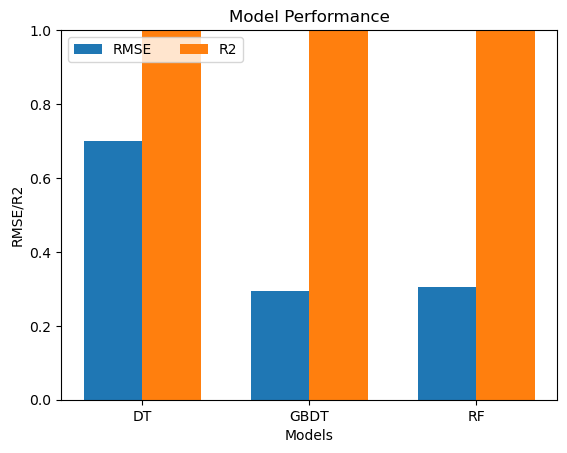

In [74]:
#display results
RMSE_Results = [dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [dt_r2, gbdt_r2, rf_r2]
labels = ['DT', 'GBDT', 'RF']

rg= np.arange(3)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [75]:
#overfitting for sure, but that's not even our label necessarily

#why not use a stacking regressor before setting up the XGBoost last
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

estimators = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

In [76]:
#make the stacking model with those other ones

stacking_model = StackingRegressor(estimators=estimators, cv=5, passthrough=False)

In [77]:
#cross scores
from sklearn.model_selection import cross_val_score
print('Performing Cross-Validation...')


three_cross_scores = cross_val_score(stacking_model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
three_cross_scores = -1 * (three_cross_scores)
rmse_avg = np.average(three_cross_scores)

print('End')
print('average score: {}'.format(rmse_avg))

Performing Cross-Validation...
End
average score: 0.0002852420942428047


In [78]:
#improving ensembles
params = {
    "DT__max_depth": [2, 4, 8],
    "GBDT__n_estimators":[100,300]
    
}

stack_grid = GridSearchCV(stacking_model, params, cv=3, verbose=4, scoring='neg_root_mean_squared_error', refit=True, n_jobs=-1)
stack_grid.fit(X_train, y_train)
print(stack_grid.best_params_)
stack_grid.cv_results_['mean_test_score']


print("best parameters:", stack_grid.best_params_)

rmse_stack_cv = -1*stack_grid.best_score_
print("[STACK] RMSE for the best model is : {:.2f}".format(rmse_stack_cv))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'DT__max_depth': 8, 'GBDT__n_estimators': 100}
best parameters: {'DT__max_depth': 8, 'GBDT__n_estimators': 100}
[STACK] RMSE for the best model is : 0.00


In [79]:
estimators_best = [
    ("DT", DecisionTreeRegressor(max_depth=4)),
    ("RF", RandomForestRegressor()),
    ("GBDT", GradientBoostingRegressor(n_estimators=100)),
    ("LR", LinearRegression())
]

In [80]:
stacking_best_model = StackingRegressor(estimators=estimators_best, cv=5, passthrough=False)

stacking_best_pred = stacking_best_model.fit_transform(X_test, y_test)

In [81]:
stacking_best_pred

array([[ 8.35000862,  8.46144551,  8.56865547,  8.45350843],
       [ 3.88998601,  3.798652  ,  3.81209698,  3.7986525 ],
       [42.16311075, 44.892999  , 44.98305526, 44.89645727],
       ...,
       [22.91580935, 22.1362567 , 21.93594095, 22.13566995],
       [14.56923561, 14.52681854, 14.52658963, 14.52681853],
       [42.16311075, 41.9893364 , 41.8270663 , 41.99018154]])

In [82]:
best_three_cross_scores = cross_val_score(stacking_best_model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
best_three_cross_scores = -1 * (best_three_cross_scores)
best_rmse_avg = np.average(best_three_cross_scores)

print('End')
print('average score: {}'.format(best_rmse_avg))

End
average score: 0.00026230300693590663


In [83]:
stacking_best_model = StackingRegressor(estimators=estimators_best,cv=5, passthrough = True)
stacking_best_model.fit(X_train, y_train)


StackingRegressor(cv=5,
                  estimators=[('DT', DecisionTreeRegressor(max_depth=4)),
                              ('RF', RandomForestRegressor()),
                              ('GBDT', GradientBoostingRegressor()),
                              ('LR', LinearRegression())],
                  passthrough=True)

In [84]:
stacking_best_pred = stacking_best_model.predict(X_test)

stack_rmse = mean_squared_error(y_test, stacking_best_pred, squared = False)


stack_r2 = r2_score(y_test, stacking_best_pred)
           
print('Root Mean Squared Error: {0}'.format(rmse))
print('R2: {0}'.format(r2))       

Root Mean Squared Error: 0.00017107718232753054
R2: 0.9999999998063577


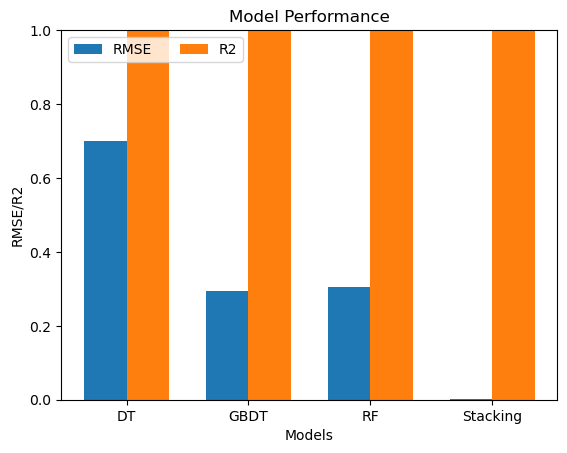

In [85]:
#display results
RMSE_Results = [dt_rmse, gbdt_rmse, rf_rmse, stack_rmse]
R2_Results = [dt_r2, gbdt_r2, rf_r2, stack_r2]
labels = ['DT', 'GBDT', 'RF', 'Stacking']

rg= np.arange(4)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [86]:
#lstm code to use later, do not run

"""
#imports
from tensorflow.keras.models import Sequential # Model initialization and format
from tensorflow.keras.layers import * # For setting up architecture
from tensorflow.keras.callbacks import ModelCheckpoint # For saving model that does best on val set
from tensorflow.keras.losses import MeanSquaredError # MSE works well for our loss function given the problem
from tensorflow.keras.metrics import RootMeanSquaredError # For extra evaluation
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay


#create model
model = Sequential() 

model.add(InputLayer((WINDOW_SIZE, 27))) # # 27 is the number of features at each time step.
model.add(LSTM(256, return_sequences=True)) # Increase LSTM units and return sequences for stacking LSTM
model.add(BatchNormalization()) # Batch normalization to normalize the activations of the previous layer,
# maintaining mean output close to 0 and output standard deviation close to 1, stabilizing the learning process.
model.add(LSTM(128, return_sequences=True)) # Another LSTM layer
model.add(BatchNormalization()) # Another batch normalization layer to stabilize learning.
model.add(LSTM(64)) # layer will output a single vector per sample, summarizing the learned features.    
model.add(Dropout(0.2)) # Dropout layer to reduce overfitting by randomly setting a fraction of the input units to 0 at each update.
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))#Dense layer with 128 units and ReLU activation function. 
#Includes L2 regularization to penalize large weights and further prevent overfitting.
model.add(Dense(1, activation='linear')) # A Dense output layer with 1 unit and linear activation function, suitable for regression.

model.summary()


#specify callbacks

cp = ModelCheckpoint('KerasSavedModel', save_best_only = True) # Only save best model after each epoch
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 7)

# Compile model with necessary parameters
model.compile(loss = MeanSquaredError(), 
              optimizer = Adam(learning_rate = 0.0001), 
              metrics = [RootMeanSquaredError()])
              

#fit model              
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 1000, callbacks = [cp, es])


#load and fit best model
from tensorflow.keras.models import load_model
model_best = load_model('KerasSavedModel')



# Make predictions
test_predictions = model_best.predict(x_test).flatten() # Without flatten, its that same double bracketed list

# Return results of best model as Dataframe
results = pd.DataFrame(data = {"Test Predictions": test_predictions, 'Actuals': y_test})
results = results

#take evaluation metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate and display RMSE for best model
mse = mean_squared_error(results['Actuals'], results['Test Predictions'])
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

print(f'r-squared: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


"""

'\n#imports\nfrom tensorflow.keras.models import Sequential # Model initialization and format\nfrom tensorflow.keras.layers import * # For setting up architecture\nfrom tensorflow.keras.callbacks import ModelCheckpoint # For saving model that does best on val set\nfrom tensorflow.keras.losses import MeanSquaredError # MSE works well for our loss function given the problem\nfrom tensorflow.keras.metrics import RootMeanSquaredError # For extra evaluation\nfrom tensorflow.keras.optimizers import Adam # Optimizer\nfrom tensorflow.keras import regularizers\nfrom tensorflow.keras.optimizers.schedules import ExponentialDecay\n\n\n#create model\nmodel = Sequential() \n\nmodel.add(InputLayer((WINDOW_SIZE, 27))) # # 27 is the number of features at each time step.\nmodel.add(LSTM(256, return_sequences=True)) # Increase LSTM units and return sequences for stacking LSTM\nmodel.add(BatchNormalization()) # Batch normalization to normalize the activations of the previous layer,\n# maintaining mean out

In [ ]:
#add in lightgbm after it's done downloading onto anaconda


#!!!!!! Download those packages at a place with better wifi ->> LA Phil or Home !!!!!!!!!!!!!!!!!!!!!